# Step 1: Understand the dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


clv_transactions = pd.read_csv('HW1 clv_transactions.csv')
clv_transactions.head()

null_columns = clv_transactions.columns[clv_transactions.isnull().any()]
print('1. Number of null columns : ' + str(len(null_columns)))

min_transaction_date = clv_transactions['TransactionDate'].min()
max_transaction_date = clv_transahctions['TransactionDate'].max()

print('\n2. Range of dates in the dataset ' + min_transaction_date + ' - ' + max_transaction_date)

print('\n3. Number of unique customers : ' + str(clv_transactions['CustomerID'].nunique()))

print('\n4. Standard descriptive statistics for the Amount field')

print(clv_transactions['Amount'].describe())

print('\n Trend in transaction amount over a period of next months')
clv_transactions['TransactionDate'] = pd.to_datetime(clv_transactions['TransactionDate'])

y = clv_transactions['Amount'].groupby([clv_transactions['TransactionDate'].dt.year,clv_transactions['TransactionDate'].dt.month]).median()

x= pd.DataFrame({ '' : range(1, 72 + 1 ,1)})
plt.xlabel("Number of months from 2010 beginning -->")
plt.ylabel("Median Transaction Amount in USD -->")
plt.scatter(x,y)

1. Number of null columns : 0


NameError: name 'clv_transahctions' is not defined


 Trend in transaction amount over a period of next years


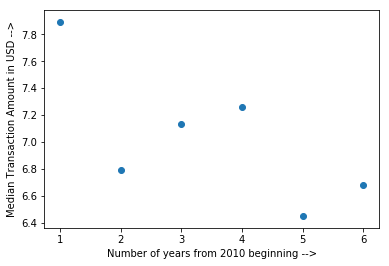

In [98]:
print('\n Trend in transaction amount over a period of next years')

y = clv_transactions['Amount'].groupby([clv_transactions['TransactionDate'].dt.year]).median()

x = pd.DataFrame({ '' : range(1, 6 + 1 ,1)})
plt.xlabel("Number of years from 2010 beginning -->")
plt.ylabel("Median Transaction Amount in USD -->")
plt.scatter(x,y)


There is no general increase in the transaction amounts over time. Though there is an increase in median transaction amounts from 2011 to 2013, but overall, there is no general trend.

# Step 2: Explore the dataset

In [99]:
#Step 2

trans_mean = clv_transactions['Amount'].mean()
trans_std = clv_transactions['Amount'].std()
# print(trans_mean,trans_std)

clv_trans = clv_transactions[~((clv_transactions['Amount'] < 0) | (clv_transactions['Amount'] < (trans_mean-3*trans_std)) |(clv_transactions['Amount'] > ((trans_mean+3*trans_std))))]
# removing outliers more than 3 standard deviations away from the mean and the points where transaction is negative

clv_trans_outliers = clv_transactions[((clv_transactions['Amount'] < 0) | (clv_transactions['Amount'] < (trans_mean-3*trans_std)) |(clv_transactions['Amount'] > ((trans_mean+3*trans_std))))]

print('These are the outlier points based on the points which are very farther away(using 3 standard deviations away from mean or if transaction is negative) and these outliers should be and are eliminated: ')
clv_trans_outliers

These are the outlier points based on the points which are very farther away(using 3 standard deviations away from mean or if transaction is negative) and these outliers should be and are eliminated: 


,TransactionID,TransactionDate,CustomerID,Amount
23,24,2011-10-07,7,1003.0
49,50,2012-05-12,13,-1.0
211,212,2014-05-14,54,1027.0
3326,3327,2014-01-16,811,-1.0
4177,4178,2012-08-13,1000,2033.0


# Step 3: Determine origin year of customers

In [100]:
#Step 3

clv_transactions = clv_trans.copy()
clv_transactions['TransactionDate'] = pd.to_datetime(clv_transactions['TransactionDate'])

origin_transaction_year = clv_transactions['TransactionDate'].dt.year.groupby(clv_transactions['CustomerID']).min()
origin_year_df = pd.DataFrame(origin_transaction_year)
origin_year_df.reset_index(level=0, inplace=True)
origin_year_df['OriginYear'] = origin_year_df['TransactionDate']
origin_year_df = origin_year_df.drop(columns=['TransactionDate'])

clv_transactions['TransactionYear'] = clv_transactions['TransactionDate'].dt.year
clv_transactions = clv_transactions.merge(origin_year_df, on='CustomerID')
clv_transactions.head()


,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear,OriginYear
0,1,2012-09-04,1,20.26,2012,2012
1,2,2012-05-15,2,10.87,2012,2012
2,3,2014-05-23,2,2.21,2014,2012
3,4,2014-10-24,2,10.48,2014,2012
4,5,2012-10-13,2,3.94,2012,2012


# Step 4: Calculate cumulative transaction amounts

In [101]:
#Step 4
df_clv_transactions = clv_transactions.groupby(['OriginYear','TransactionYear'])[['Amount']].sum()

df_clv_transactions = df_clv_transactions.reset_index() 
df_clv_transactions1 = df_clv_transactions

def getting_cumulative_transactions(months):
    trans = df_clv_transactions1[df_clv_transactions1['TransactionYear']==(df_clv_transactions1['OriginYear'] -1+months//12)]['Amount']
    df_clv_transactions_merged = trans.reset_index()
    df_clv_transactions_merged = df_clv_transactions_merged.drop(columns=['index'])
    df_clv_transactions_merged.rename(columns = {"Amount":months},inplace=True)
    return df_clv_transactions_merged

df_clv_transactions_merged = getting_cumulative_transactions(12)
df_clv_transactions_merged2 = getting_cumulative_transactions(24)
df_clv_transactions_merged3 = getting_cumulative_transactions(36)
df_clv_transactions_merged4 = getting_cumulative_transactions(48)
df_clv_transactions_merged5 = getting_cumulative_transactions(60)
df_clv_transactions_merged6 = getting_cumulative_transactions(72)

df_merged = pd.concat([df_clv_transactions_merged,df_clv_transactions_merged2,df_clv_transactions_merged3,df_clv_transactions_merged4,df_clv_transactions_merged5,df_clv_transactions_merged6], axis=1)
df_merged.index = ['2010-01-01–2010-12-31','2011-01-01-2011-12-31','2012-01-01–2012-12-31','2013-01-01–2013-12-31','2014-01-01–2014-12-31','2015-01-01–2015-12-31']
df_merged.index.name = 'Origin'
df_merged = df_merged.cumsum(axis=1)
df_merged = df_merged.fillna(0)
df_merged

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01–2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01-2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2012-01-01–2012-12-31,2181.35,3874.69,5226.86,6501.85,0.00,0.00
2013-01-01–2013-12-31,2179.85,3609.81,5227.75,0.00,0.00,0.00
2014-01-01–2014-12-31,1830.85,3262.05,0.00,0.00,0.00,0.00
2015-01-01–2015-12-31,1912.17,0.00,0.00,0.00,0.00,0.00


# Step 5: Calculate cumulative transaction amounts 

In [102]:
#Step 5

total_customers = clv_transactions[clv_transactions['OriginYear'] == clv_transactions['TransactionYear']]
total_customers = total_customers.groupby(['CustomerID','OriginYear'])[['Amount']].count()
total_customers.index.name = ['Origin']
total_customers.rename(columns = {'OriginYear':'Count'})

total_customers = total_customers.groupby(['OriginYear'])['Amount'].count()
total_customers = pd.DataFrame(total_customers)

for i in range(1,7):
    a = []
    for j in range(0,7-i):
        a.append(total_customers['Amount'][2010 + (j)])
    for j in range(7-i,6):
        a.append(0)
    total_customers[12*(i)] = a
total_customers = total_customers.drop(columns = ['Amount'])           
total_customers.index = ['2010-01-01–2010-12-31','2011-01-01-2011-12-31','2012-01-01–2012-12-31','2013-01-01–2013-12-31','2014-01-01–2014-12-31','2015-01-01–2015-12-31']
total_customers.index.name = 'Origin'

total_customers

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01–2010-12-31,172,172,172,172,172,172
2011-01-01-2011-12-31,170,170,170,170,170,0
2012-01-01–2012-12-31,163,163,163,163,0,0
2013-01-01–2013-12-31,180,180,180,0,0,0
2014-01-01–2014-12-31,155,155,0,0,0,0
2015-01-01–2015-12-31,160,0,0,0,0,0


# Step 6: Historic CLV 

In [103]:
# Step 6
clv = df_merged/total_customers
# clv.round(2)
clv.fillna(0)

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01–2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011-01-01-2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,0.000000
2012-01-01–2012-12-31,13.382515,23.771104,32.066626,39.888650,0.000000,0.000000
2013-01-01–2013-12-31,12.110278,20.054500,29.043056,0.000000,0.000000,0.000000
2014-01-01–2014-12-31,11.811935,21.045484,0.000000,0.000000,0.000000,0.000000
2015-01-01–2015-12-31,11.951062,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Historic CLV')

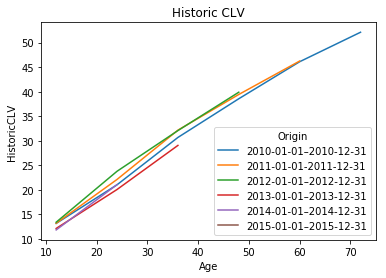

In [104]:
line_plot = clv.transpose().plot.line()
line_plot.set_xlabel('Age')
line_plot.set_ylabel('HistoricCLV')
line_plot.set_title('Historic CLV')

# line_plot.set_xticklabels(clv.columns, rotation=0)
# line_plot.set_yticklabels([10,20,30,40,50,60], rotation=0)


# Step 7: Interpreting your results 

In [108]:
x= df_merged.cumsum()
y= total_customers.cumsum()
interpretation = (x.iloc[-1]/y.iloc[-1]).round(2)
print('Age vs HistoricCLV')
interpretation

Age vs HistoricCLV


12    12.60
24    21.57
36    30.94
48    39.28
60    46.18
72    52.12
Name: 2015-01-01–2015-12-31, dtype: float64

a) Customers acquired in 2011 have spent \\$8964 till date i.e. \\$46.24 on average.

b) Each group of customers exhibit similar patterns of spending. Lower bound on CLV over a period of 6 years is \\$52 which increases by around \\$7-\\$9 every year. So, the cost taken to acquire a customer should be less than the lower bound of CLV for the company to be profitable. 